customer_id     100
location       5100
gender         5100
signup_date    5100
Unnamed: 0     5600
sale_id         600
product_id      500
timestamp       600
quantity        600
price           500
revenue         600
name           5500
category       5500
supplier       5500
dtype: int64
Columns with missing values and their counts:
customer_id     100
location       5100
gender         5100
signup_date    5100
Unnamed: 0     5600
sale_id         600
product_id      500
timestamp       600
quantity        600
price           500
revenue         600
name           5500
category       5500
supplier       5500
dtype: int64
  Column 'customer_id' has 10000 duplicate values.
  Column 'location' has 6735 duplicate values.
  Column 'gender' has 6710 duplicate values.
  Column 'signup_date' has 6342 duplicate values.
  Column 'Unnamed: 0' has 3278 duplicate values.
  Column 'sale_id' has 5298 duplicate values.
  Column 'product_id' has 10009 duplicate values.
  Column 'timestamp' has 8931 

C:\Users\Hp ProBook 640 G5\AppData\Local\Temp\ipykernel_20496\1526131212.py:105: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=final_merged, x='year_month', y='revenue', palette='viridis')


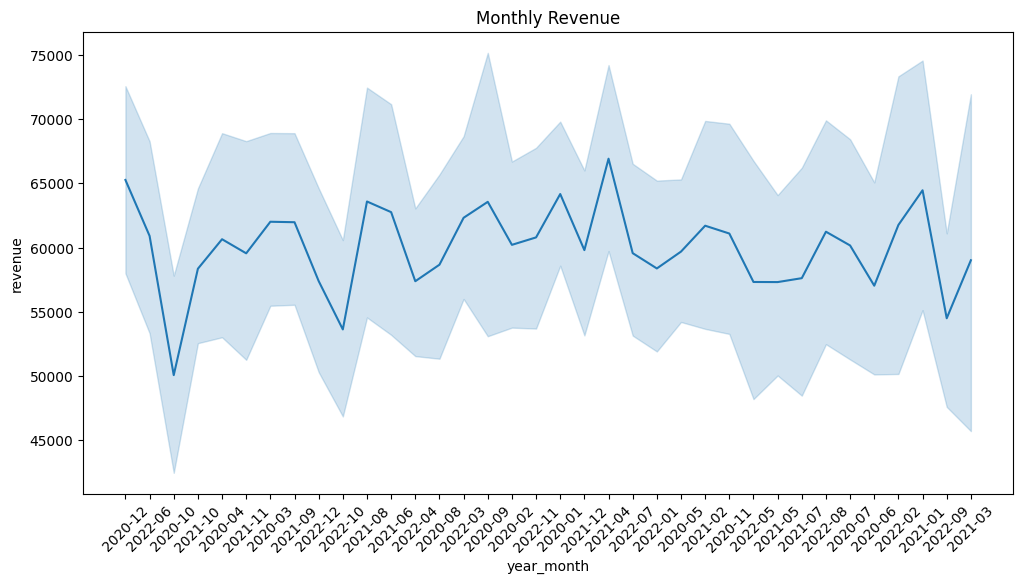

C:\Users\Hp ProBook 640 G5\AppData\Local\Temp\ipykernel_20496\1526131212.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_merged, x='category', y='supplier', palette='viridis')


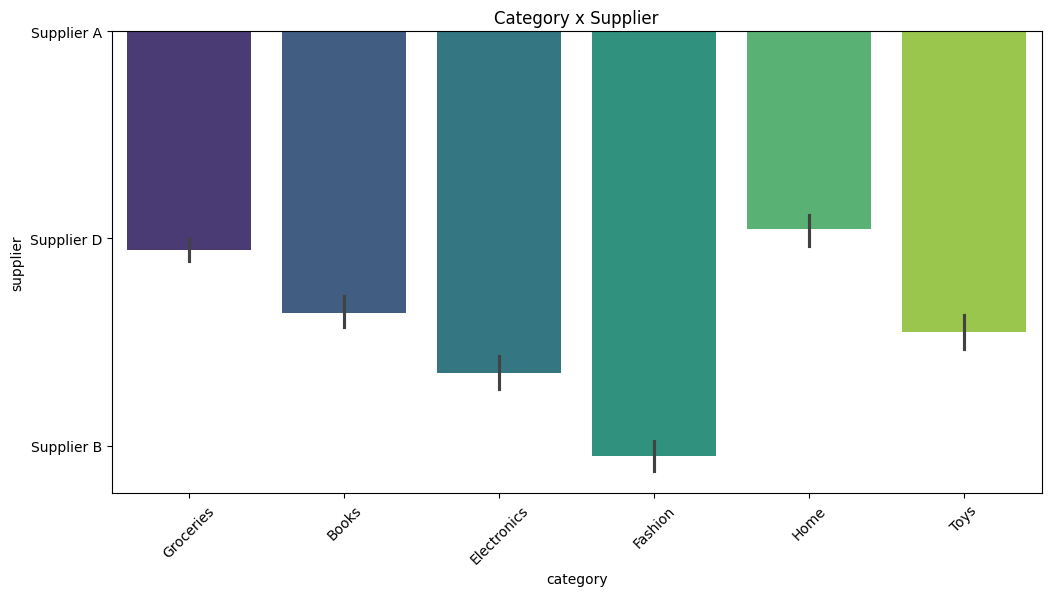

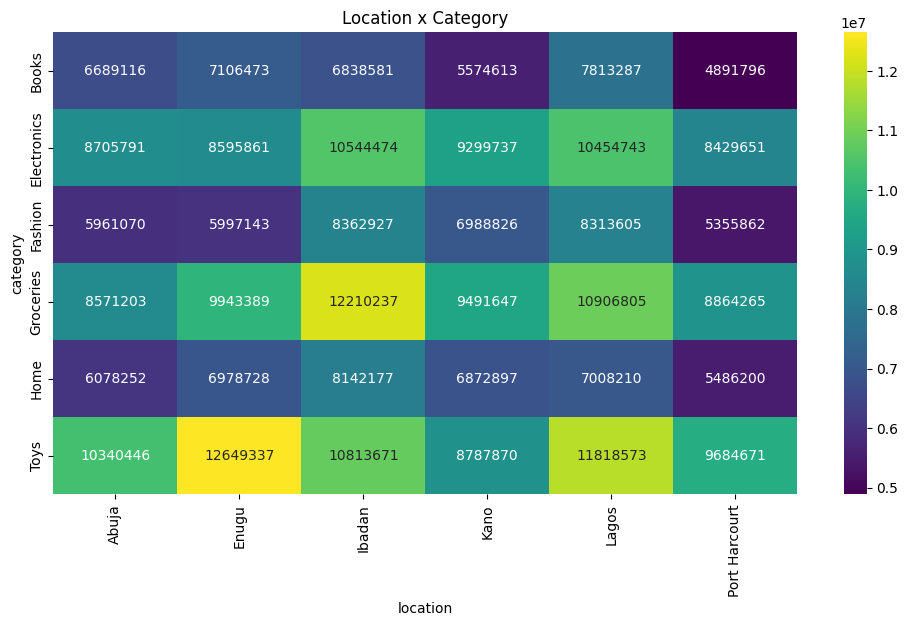

In [5]:

import pandas as pd
import random
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
def random_number():
    return random.randint(1000, 9999)
folder_path = "C:\\Users\\Hp ProBook 640 G5\\Ecommerce-data-analysis\\data"
files = glob.glob(os.path.join(folder_path, "*.csv"))
df_list = [pd.read_csv(file) for file in files]
combined_df = pd.concat(df_list, ignore_index=True)
#find missing values
missing_counts = combined_df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
missing_counts = combined_df.isnull().sum()
print(missing_counts)
missing_columns = missing_counts[missing_counts > 0]
print("Columns with missing values and their counts:")
print(missing_columns)
for col in combined_df.columns:
    combined_df[col] = combined_df[col].apply(lambda x: random_number() if pd.isnull(x) else x)
#check for duplicates
for col in combined_df.columns:
        duplicate_count = combined_df[col].duplicated().sum()
        if duplicate_count > 0:
            print(f"  Column '{col}' has {duplicate_count} duplicate values.")
        else:
            print(f"  Column '{col}' has no duplicates.")
#Handle duplicates
for col in combined_df.columns:
    duplicate_mask = combined_df[col].duplicated()
    combined_df.loc[duplicate_mask, col] = [random_number() for _ in range(duplicate_mask.sum())]#
print("After handling missing values and duplicates:")
print(combined_df)
combined_df['Revenue'] = combined_df['price'] * combined_df['quantity']
print(combined_df)
#Merge datasets and perform analysis
customers = pd.read_csv(r"C:\Users\Hp ProBook 640 G5\Ecommerce-data-analysis\data\customers.csv")
products = pd.read_csv(r"C:\Users\Hp ProBook 640 G5\Ecommerce-data-analysis\data\products.csv")
sales = pd.read_csv(r"C:\Users\Hp ProBook 640 G5\Ecommerce-data-analysis\data\sales.csv")
merged12 = pd.merge(customers, sales, on=("customer_id"), how='inner')
final_merged = pd.merge(merged12, products, on=(["product_id", "price"]), how='inner')
print(final_merged)
final_merged.to_csv("master_dataset.csv", index=True)
change = final_merged.groupby('customer_id')['revenue'].sum().reset_index()
change.columns = ['customer_id', 'customer_lifetime_value']
revenue_by_product = final_merged.groupby('product_id')['revenue'].sum().reset_index()
revenue_by_category = final_merged.groupby('category')['revenue'].sum().reset_index()
revenue_by_supplier = final_merged.groupby('supplier')['revenue'].sum().reset_index()
print("Customer Lifetime Value:")
print(change)
print("Revenue by Category:")
print(revenue_by_category)
print("Revenue by Supplier:")
print(revenue_by_supplier)
print("Revenue by Product:")
print(revenue_by_product)
final_merged['signup_date'] = pd.to_datetime(final_merged['signup_date'])
final_merged['year_month'] = final_merged['signup_date'].dt.to_period('M').astype(str)
# Created a pivot table to show monthly revenue
ptable = pd.pivot_table(final_merged, values='revenue', index='year_month', aggfunc='sum', fill_value=0)    
print("Pivot Table - Monthly Revenue:")
print(ptable)
df = pd.read_csv("master_dataset.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"]) 
backend_date = df["timestamp"].max() + pd.Timedelta(days=1)
rfm = df.groupby("customer_id").agg({
    "timestamp": lambda x: (backend_date - x.max()).days,  
    "sale_id": "nunique",                                  
    "revenue": "sum"                                      
})
rfm.rename(columns={
    "timestamp": "Recency",
    "sale_id": "Frequency",
    "revenue": "Monetary"
}, inplace=True)
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_score"] = pd.qcut(rfm["Frequency"], 5, labels=[1, 2, 3, 4, 5])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) + 
    rfm["F_score"].astype(str) + 
    rfm["M_score"].astype(str)
)
def segment_customer(row):
    r = int(row["R_score"])
    if row["RFM_Score"] == "555":
        return "VIP"
    elif r == 5:
        return "ACTIVE"
    elif r == 1:
        return "AT_RISK"
    elif r < 1: 
        return "LOST"
    else:
        return "OTHERS"
 
rfm["Segment"] = rfm.apply(segment_customer, axis=1)
print("RFM Segmentation:")
print(rfm.head(10))  
heatmap_data = final_merged.pivot_table(index='category', columns='location', values='revenue', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=final_merged, x='year_month', y='revenue', palette='viridis')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(data=final_merged, x='category', y='supplier', palette='viridis')
plt.title('Category x Supplier')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d")
plt.title('Location x Category')
plt.xticks(rotation=90)
plt.show()